In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_csv("data\\Data_Files\\1_Regression\\House_Price.csv")
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


In [11]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


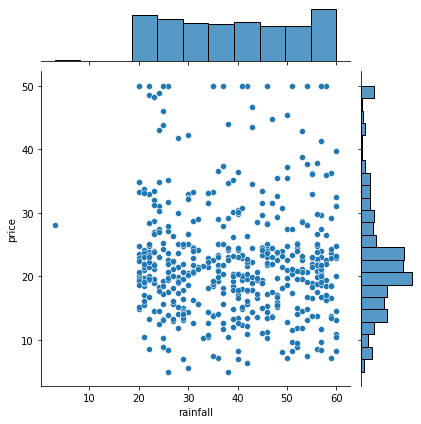

In [12]:
sns.jointplot(x='rainfall', y='price', data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

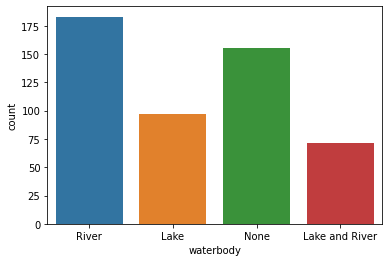

In [15]:
sns.countplot(x="waterbody", data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

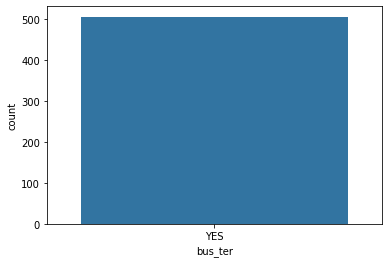

In [16]:
sns.countplot(x="bus_ter", data=df)

**Observation**

1. Missing variables in n_hos_beds
2. Skewness or outliers in crime_rate
3. Outliers in n_hot_rooms and rainfall
4. bus_ter not needed takes only one value

In [24]:
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [27]:
df[df.n_hot_rooms > uv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [26]:
df.n_hot_rooms[(df.n_hot_rooms) > 3*uv] = 3*uv

C:\Users\raghv\AppData\Local\Temp\ipykernel_7560\4290411079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms) > 3*uv] = 3*uv


In [28]:
lv = np.percentile(df.rainfall, [1])[0]
lv

20.0

In [31]:
df[df.rainfall < lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


In [30]:
df.rainfall[df.rainfall < 0.3*lv] = 0.3*lv

C:\Users\raghv\AppData\Local\Temp\ipykernel_7560\3379725308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[df.rainfall < 0.3*lv] = 0.3*lv


In [43]:
df[df.n_hos_beds.notna()]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.17920,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.16480,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.19120,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.17600,None,47,YES,0.060694


In [44]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [45]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711
